In [2]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver import ActionChains
from bs4 import BeautifulSoup
import time
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.support.ui import Select

chrome_options = webdriver.ChromeOptions()

url = 'https://companiesmarketcap.com/usa/largest-companies-in-the-usa-by-market-cap/'
driver = webdriver.Chrome(service=Service('../driver/chromedriver'), options=chrome_options)
driver.set_window_size(1920,1080)
driver.get(url)

In [149]:
# 주식 TOP 100 TICKER 크롤링
comp_name=[]
code = []
a = driver.find_elements(By.CLASS_NAME,'company-code')

# for i in range(len(a)):
#     a = driver.find_elements(By.CLASS_NAME,'company-code')
#     b = driver.find_elements(By.CLASS_NAME,'company-name')
#     c = a[i].get_attribute('innerText')
#     d = b[i].get_attribute('innerText')
#     comp_name.append(d)
#     code.append(c)

# driver.find_element(By.CLASS_NAME,'page-link').click()

for j in range(len(a)):
    a = driver.find_elements(By.CLASS_NAME,'company-code')
    b = driver.find_elements(By.CLASS_NAME,'company-name')
    c = a[j].get_attribute('innerText')
    d = b[j].get_attribute('innerText')
    comp_name.append(d)
    code.append(c)

In [152]:
for j in range(len(a)):
    a = driver.find_elements(By.CLASS_NAME,'company-code')
    b = driver.find_elements(By.CLASS_NAME,'company-name')
    c = a[j].get_attribute('innerText')
    d = b[j].get_attribute('innerText')
    comp_name.append(d)
    code.append(c)

In [153]:
comp_code =[]
for i in code:
    temp = i.replace('-','.').replace('META','FB')
    comp_code.append(temp)


In [305]:
import pandas as pd
df_tmp = pd.DataFrame({'company': comp_name,
                       'code':comp_code
                       })

df_tmp.to_csv('../data/ticker_us.csv', sep=',', encoding='utf-8')

NameError: name 'comp_name' is not defined

---
### ticker list 가져오기

In [17]:
import pandas as pd
df_ticker_list= pd.read_csv('../data/ticker_us.csv', index_col=0)
company_code = df_ticker_list['code'].tolist()
df_ticker_list = df_ticker_list.set_index('code')
df_ticker_list.head(3)

,compnay
code,
AAPL,Apple
MSFT,Microsoft
GOOG,Alphabet (Google)


---

In [3]:
url = 'https://stockrow.com/users/sign_in'
driver.get(url)
driver.set_window_size(1920,1080)
time.sleep(0.5)
sign_in = driver.find_elements(By.TAG_NAME,'input')
email = sign_in[1].send_keys('ksyrobot@gmail.com')
password = sign_in[2].send_keys('rlatpdus22')
sign_in[5].click()


In [30]:
len(company_code[102:352])

250

In [21]:
from tqdm import tqdm
url_base = 'https://stockrow.com/'
code_error = 0
test = []
year_list = []
key_index_list = [6, 8, 19, 21, 22, 23, 25] #원하는 지표 : PER, PBR, 
data_list = []
usa_df = []

for each_company in tqdm(company_code[102:352]):
    # if  len(usa_df) <= 1:
        driver.get(url_base + each_company)
        time.sleep(2)

        try:
            table = driver.find_element(By.CLASS_NAME, 'fundamentals') #전체 테이블
            table_rows = table.find_elements(By.TAG_NAME, 'tr')

            for key_index in key_index_list:
                raw_data = table_rows[key_index].find_elements(By.TAG_NAME, 'td')
                tag_list = []


                # replacing , or %
                if key_index not in [23, 25]:
                    for tag in raw_data:
                        tag_list.append(tag.text.replace(",",''))
                    data_list.append(tag_list)

                else:
                    for tag in raw_data:
                        tag_list.append(tag.text.replace('%',''))
                    data_list.append(tag_list)      
            

            # company_name_code add
            company_name_list = []
            real_company_name = df_ticker_list.loc[each_company][0]
            for i in range(14):
                company_name_list.append(real_company_name)
                
            data_list.append(company_name_list)
            
            usa_df.append(data_list)
            data_list = [] 
            time.sleep(0.1)

        except:
            print(usa_df[-1])
            code_error += 1
            print(each_company)
        
    # else:
    #     break

  2%|▏         | 5/250 [00:35<25:34,  6.26s/it]

[['62.27', '17.37', '19.79', '14.62', '13.52', '11.75', '13.31', '20.81', '23.89', '12.95', '16.10', '19.90', '14.60', 'PE Ratio'], ['1.66', '2.21', '2.43', '2.19', '3.28', '4.25', '6.18', '9.04', '15.50', '9.50', '9.12', '8.10', '6.97', 'PB Ratio'], ['559.80', '727.94', '587.24', '1254.68', '1873.15', '2382.28', '2872.52', '1923.21', '3239.07', '2553.64', '5684.00', '3204.00', '4176.00', 'FCF'], ['1490.83', '1518.82', '2361.03', '4325.86', '2693.41', '2416.59', '4489.90', '5810.73', '5001.68', '5005.83', '–', '–', '–', 'Total Debt'], ['4488.87', '5029.73', '5344.95', '6102.07', '6987.31', '6580.04', '4723.30', '5183.49', '6027.19', '6278.37', '–', '–', '–', "Sh' Equity"], ['1.49', '8.30', '7.55', '8.45', '13.92', '19.35', '17.90', '16.96', '25.67', '27.84', '25.80', '20.00', '22.80', 'ROA'], ['2.37', '13.29', '12.64', '15.97', '25.94', '35.09', '38.77', '45.46', '69.73', '74.85', '62.50', '41.80', '46.30', 'ROE'], ['Lam Research', 'Lam Research', 'Lam Research', 'Lam Research', 'Lam R

  8%|▊         | 20/250 [02:03<17:33,  4.58s/it]

[['24.80', '29.29', '22.81', '22.63', '21.73', '33.04', '34.76', '32.72', '49.60', '31.92', '31.10', '25.80', '–', 'PE Ratio'], ['10.68', '25.39', '27.58', '13.42', '10.54', '9.81', '12.99', '18.41', '37.93', '23.73', '18.33', '19.06', '–', 'PB Ratio'], ['917.09', '880.98', '1213.12', '1069.55', '1661.20', '1692.70', '1992.40', '3104.80', '1872.60', '–', '2224.00', '2563.00', '–', 'FCF'], ['1721.87', '1798.70', '1949.89', '1952.54', '10520.60', '9343.70', '8685.20', '8292.10', '9615.00', '10569.70', '–', '–', '–', 'Total Debt'], ['1774.54', '996.47', '867.91', '1878.44', '3647.90', '3730.70', '4123.30', '3610.80', '2437.20', '3102.10', '–', '–', '–', "Sh' Equity"], ['11.86', '14.33', '18.36', '18.08', '12.97', '5.68', '7.78', '9.93', '9.08', '9.34', '8.91', '13.00', '–', 'ROA'], ['43.68', '63.42', '113.05', '82.49', '62.53', '30.05', '39.25', '52.51', '61.65', '0.00', '63.50', '72.00', '–', 'ROE'], ['Sherwin-Williams', 'Sherwin-Williams', 'Sherwin-Williams', 'Sherwin-Williams', 'Sherwi

 13%|█▎        | 33/250 [03:13<16:38,  4.60s/it]

[['15.19', '17.02', '16.39', '18.90', '7.78', '15.71', '18.94', '30.23', '24.56', '18.21', '18.30', '17.00', '15.30', 'PE Ratio'], ['2.56', '2.73', '2.10', '2.53', '2.59', '2.70', '3.37', '4.10', '5.39', '4.54', '4.21', '4.12', '0.00', 'PB Ratio'], ['1251.00', '911.00', '586.00', '1277.00', '1732.00', '1979.00', '2250.00', '2476.00', '2944.00', '2537.00', '2482.00', '2392.00', '2768.00', 'FCF'], ['9448.00', '8985.00', '10093.00', '10212.00', '9836.00', '11145.00', '12196.00', '12681.00', '13840.00', '15182.00', '–', '–', '–', 'Total Debt'], ['11289.00', '12408.00', '12188.00', '12409.00', '16359.00', '15362.00', '15184.00', '14791.00', '13641.00', '12733.00', '–', '–', '–', "Sh' Equity"], ['6.06', '6.07', '4.60', '4.82', '15.30', '7.39', '7.33', '5.30', '7.86', '8.45', '7.90', '9.38', '9.30', 'ROA'], ['18.08', '16.83', '12.60', '13.52', '37.54', '16.77', '17.79', '13.41', '21.12', '24.80', '23.20', '26.10', '25.90', 'ROE'], ['Norfolk Southern', 'Norfolk Southern', 'Norfolk Southern', '

 34%|███▍      | 85/250 [08:12<16:23,  5.96s/it]

[['–', '–', '–', '120.83', '120.83', '120.83', '0.00', '43.02', '19.87', '31.35', '–', '–', '–', 'PE Ratio'], ['–', '–', '–', '0.29', '0.29', '0.29', '0.90', '1.16', '1.36', '1.65', '–', '–', '–', 'PB Ratio'], ['–', '–', '–', '3357.00', '1190.00', '(949.00)', '156.00', '1672.00', '2229.00', '340.00', '–', '–', '–', 'FCF'], ['–', '–', '–', '–', '13070.00', '7938.00', '122.00', '1105.00', '1117.00', '1307.00', '–', '–', '–', 'Total Debt'], ['–', '–', '–', '–', '0.00', '75153.00', '24555.00', '25063.00', '25623.00', '25541.00', '–', '–', '–', "Sh' Equity"], ['–', '–', '–', '0.00', '2.63', '(9.32)', '(1.27)', '1.60', '4.14', '2.70', '–', '–', '–', 'ROA'], ['–', '–', '–', '0.00', '3.91', '(6.77)', '(1.92)', '2.74', '6.94', '4.48', '–', '–', '–', 'ROE'], ['Corteva', 'Corteva', 'Corteva', 'Corteva', 'Corteva', 'Corteva', 'Corteva', 'Corteva', 'Corteva', 'Corteva', 'Corteva', 'Corteva', 'Corteva', 'Corteva']]
APO


 43%|████▎     | 107/250 [10:11<10:44,  4.51s/it]

[['–', '19.46', '22.33', '22.09', '18.06', '21.38', '24.32', '19.71', '19.24', '35.67', '–', '13.60', '11.50', 'PE Ratio'], ['–', '2.57', '3.47', '3.62', '1.57', '2.58', '2.04', '2.05', '1.32', '1.78', '–', '1.30', '1.16', 'PB Ratio'], ['–', '314.00', '1120.00', '508.00', '1545.00', '1067.00', '559.00', '753.00', '4634.00', '3295.00', '–', '2943.00', '3465.00', 'FCF'], ['–', '669.00', '879.00', '1221.00', '4655.00', '4699.00', '6686.00', '13726.00', '16779.00', '18838.00', '–', '–', '–', 'Total Debt'], ['–', '1243.00', '1743.00', '2168.00', '5909.00', '6864.00', '11013.00', '12659.00', '25885.00', '26940.00', '–', '–', '–', "Sh' Equity"], ['–', '5.24', '5.79', '5.39', '4.08', '3.94', '3.41', '3.67', '3.30', '1.83', '–', '4.07', '4.20', 'ROA'], ['–', '15.02', '18.15', '18.15', '13.92', '12.96', '10.07', '11.16', '9.38', '5.10', '–', '12.40', '12.80', 'ROE'], ['Centene', 'Centene', 'Centene', 'Centene', 'Centene', 'Centene', 'Centene', 'Centene', 'Centene', 'Centene', 'Centene', 'Centene

 55%|█████▍    | 137/250 [12:49<08:28,  4.50s/it]

[['24.81', '22.31', '22.48', '21.99', '28.04', '17.58', '18.85', '31.89', '21.85', '12.80', '15.10', '13.90', '–', 'PE Ratio'], ['4.97', '4.14', '3.94', '3.20', '3.94', '3.23', '3.15', '4.08', '3.90', '2.40', '2.57', '2.30', '–', 'PB Ratio'], ['1162.20', '1261.00', '1914.00', '1345.00', '2123.00', '2215.00', '2107.00', '2901.00', '2216.00', '2236.00', '2202.00', '2473.00', '–', 'FCF'], ['–', '937.50', '877.00', '878.00', '873.00', '745.00', '951.00', '923.00', '867.00', '638.00', '–', '–', '–', 'Total Debt'], ['6135.79', '7740.20', '9278.00', '10728.00', '10669.00', '11424.00', '11022.00', '10836.00', '11991.00', '12309.00', '–', '–', '–', "Sh' Equity"], ['16.77', '14.67', '13.24', '11.37', '10.20', '13.53', '11.49', '8.40', '12.29', '12.83', '12.10', '12.50', '–', 'ROA'], ['22.36', '20.74', '19.09', '15.53', '14.06', '19.02', '16.41', '12.74', '18.72', '18.85', '17.90', '18.20', '–', 'ROE'], ['Cognizant Technology Solutions', 'Cognizant Technology Solutions', 'Cognizant Technology Sol

 81%|████████  | 203/250 [17:33<02:47,  3.56s/it]

[['–', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '50.33', '0.00', '–', '(59.50)', '528.00', 'PE Ratio'], ['–', '21.07', '18.81', '8.45', '11.76', '11.86', '7.01', '10.08', '8.78', '9.19', '–', '21.55', '20.00', 'PB Ratio'], ['–', '(23.26)', '(77.17)', '(146.59)', '(124.81)', '(147.62)', '(224.75)', '(234.49)', '774.16', '(551.34)', '–', '(249.00)', '273.00', 'FCF'], ['–', '–', '–', '–', '–', '–', '–', '77.00', '75.00', '71.00', '–', '–', '–', 'Total Debt'], ['–', '230.19', '210.83', '685.91', '634.09', '677.57', '1273.94', '1876.29', '3488.10', '3065.14', '–', '–', '–', "Sh' Equity"], ['–', '(13.09)', '(16.15)', '(17.80)', '(16.17)', '(14.63)', '(18.70)', '(8.55)', '19.77', '(17.47)', '–', '(6.91)', '(0.73)', 'ROA'], ['–', '(27.40)', '(34.53)', '(26.87)', '(21.23)', '(19.14)', '(22.82)', '(10.07)', '22.88', '(20.58)', '–', '(4.45)', '2.77', 'ROE'], ['Seagen', 'Seagen', 'Seagen', 'Seagen', 'Seagen', 'Seagen', 'Seagen', 'Seagen', 'Seagen', 'Seagen', 'Seagen', 'Seagen', 'Sea

100%|██████████| 250/250 [20:45<00:00,  4.98s/it]


In [26]:
len(usa_df[-1]),usa_df[-1]

(8,
 [['34.47',
   '29.80',
   '25.71',
   '28.87',
   '41.07',
   '42.68',
   '50.14',
   '46.62',
   '61.24',
   '62.80',
   '55.70',
   '49.50',
   '42.90',
   'PE Ratio'],
  ['4.91',
   '4.65',
   '3.84',
   '4.32',
   '6.12',
   '7.39',
   '9.73',
   '7.28',
   '8.12',
   '8.35',
   '6.51',
   '5.70',
   '4.44',
   'PB Ratio'],
  ['113.51',
   '174.28',
   '154.61',
   '228.85',
   '262.29',
   '286.62',
   '408.44',
   '386.19',
   '407.90',
   '435.87',
   '497.00',
   '554.00',
   '611.00',
   'FCF'],
  ['377.51',
   '329.11',
   '367.60',
   '458.23',
   '673.98',
   '532.47',
   '561.96',
   '739.83',
   '236.50',
   '290.27',
   '–',
   '–',
   '–',
   'Total Debt'],
  ['723.24',
   '774.62',
   '893.27',
   '1047.70',
   '1248.29',
   '1503.01',
   '1694.66',
   '2010.61',
   '2296.94',
   '2648.31',
   '–',
   '–',
   '–',
   "Sh' Equity"],
  ['7.51',
   '8.03',
   '8.27',
   '8.36',
   '8.25',
   '10.04',
   '11.66',
   '9.64',
   '8.64',
   '9.26',
   '0.00',
   '0.00',


In [37]:
tmp_list = []
for i in range(len(test)):
    tmp_list.append(test[i][-1])

tmp_list, len(tmp_list)

(['PE Ratio',
  'PB Ratio',
  'FCF',
  'Total Debt',
  "Sh' Equity",
  'ROA',
  'ROE',
  'AMZN'],
 8)

---
---
### 판다 데이터 프레임으로 정렬

In [29]:
# 빈 데이터 프레임 생성
StockMarketEDA_us_raw = pd.DataFrame(columns = [
    'year',
    'PE ratio',
    'PB Ratio',
    'FCF',
    'Total Debt',
    'Sh Equity',
    'ROA',
    'ROE',
    'company name'
])


year = [yr for yr in range(2013,2023)]
user_year = -4 # -4:2022, -3:2023
# loop 를 돌며 데이터 프레임 생성
for each_company in usa_df:
    df_temp = pd.DataFrame({
        'year': year,
        'PE ratio': each_company[0][:user_year],
        'PB Ratio': each_company[1][:user_year],
        'FCF': each_company[2][:user_year],
        'Total Debt': each_company[3][:user_year],
        'Sh Equity': each_company[4][:user_year],
        'ROA': each_company[5][:user_year],
        'ROE': each_company[6][:user_year],
        'company name': each_company[-1][:user_year],
    })
    StockMarketEDA_us_raw = pd.concat([StockMarketEDA_us_raw,df_temp])
StockMarketEDA_us_raw.reset_index(inplace=True)
del StockMarketEDA_us_raw['index']
StockMarketEDA_us_raw.tail(13)

,year,PE ratio,PB Ratio,FCF,Total Debt,Sh Equity,ROA,ROE,company name
3417,2020,28.83,5.56,522.09,1353.42,2600.14,8.88,20.79,J. B. Hunt
3418,2021,28.63,6.91,346.88,1301.23,3117.82,11.96,26.61,J. B. Hunt
3419,2022,18.76,4.88,–,1261.74,3666.77,13.34,0.00,J. B. Hunt
3420,2013,34.47,4.91,113.51,377.51,723.24,7.51,14.19,HEICO
3421,2014,29.80,4.65,174.28,329.11,774.62,8.03,16.20,HEICO
3422,2015,25.71,3.84,154.61,367.60,893.27,8.27,15.99,HEICO
3423,2016,28.87,4.32,228.85,458.23,1047.70,8.36,16.09,HEICO
3424,2017,41.07,6.12,262.29,673.98,1248.29,8.25,16.20,HEICO
3425,2018,42.68,7.39,286.62,532.47,1503.01,10.04,18.84,HEICO
3426,2019,50.14,9.73,408.44,561.96,1694.66,11.66,20.51,HEICO


In [31]:
StockMarketEDA_us_raw.to_csv('../data/StockMarketEDA_us_raw_350.csv', sep=',', encoding='utf-8')

In [32]:
StockMarketEDA_us_raw= pd.read_csv('../data/StockMarketEDA_us_raw_350.csv', index_col=0)
StockMarketEDA_us_raw.tail(11)

,year,PE ratio,PB Ratio,FCF,Total Debt,Sh Equity,ROA,ROE,company name
3419,2022,18.76,4.88,–,1261.74,3666.77,13.34,0.00,J. B. Hunt
3420,2013,34.47,4.91,113.51,377.51,723.24,7.51,14.19,HEICO
3421,2014,29.80,4.65,174.28,329.11,774.62,8.03,16.20,HEICO
3422,2015,25.71,3.84,154.61,367.60,893.27,8.27,15.99,HEICO
3423,2016,28.87,4.32,228.85,458.23,1047.70,8.36,16.09,HEICO
3424,2017,41.07,6.12,262.29,673.98,1248.29,8.25,16.20,HEICO
3425,2018,42.68,7.39,286.62,532.47,1503.01,10.04,18.84,HEICO
3426,2019,50.14,9.73,408.44,561.96,1694.66,11.66,20.51,HEICO
3427,2020,46.62,7.28,386.19,739.83,2010.61,9.64,16.95,HEICO
3428,2021,61.24,8.12,407.90,236.50,2296.94,8.64,14.12,HEICO


---
### ```-``` 있는 데이터 분리 

In [33]:
wrong_value_index_list = []

column_list = StockMarketEDA_us_raw.columns.values.tolist()
for column in column_list:
    for index, each_row in enumerate(StockMarketEDA_us_raw[column]):
        if each_row == '–':
            wrong_value_index_list.append(StockMarketEDA_us_raw['company name'][index])

len(wrong_value_index_list)

1623

In [34]:
df_wrong_value_company_list = pd.DataFrame({'wrong_value_company_list':wrong_value_index_list})
wrong_value_company_list = df_wrong_value_company_list['wrong_value_company_list'].unique().tolist()
all_company_list = StockMarketEDA_us_raw['company name'].unique().tolist()


,wrong_value_company_list
0,Alphabet (Google)
1,Berkshire Hathaway
2,Meta Platforms (Facebook)
3,Coca-Cola
4,AbbVie
...,...
1618,PPL
1619,EPAM Systems
1620,Monolithic Power Systems
1621,BioMarin Pharmaceutical


In [155]:
def EDA_each(EDA_df, index):
    return EDA_df.loc[EDA_df['company name'] == index]

StockMarketEDA_us_clean = pd.DataFrame(columns = [
    'PE ratio',
    'PB Ratio',
    'FCF',
    'Total Debt',
    'Sh Equity',
    'ROA',
    'ROE',
    'company name'
])


for each_company in all_company_list:
    if each_company not in wrong_value_company_list:
        tmp = EDA_each(StockMarketEDA_us_raw,each_company)
        StockMarketEDA_us_clean = pd.concat([StockMarketEDA_us_clean, tmp])

StockMarketEDA_us_clean.insert(0, 'company_name', StockMarketEDA_us_clean.pop('company name'))

StockMarketEDA_us_clean = StockMarketEDA_us_clean.reset_index()
del StockMarketEDA_us_clean['index']

for index in range(len(StockMarketEDA_us_clean)):
    for column in StockMarketEDA_us_clean.columns.values.tolist():
        if type(StockMarketEDA_us_clean[column].loc[index]) == str:
            StockMarketEDA_us_clean[column].loc[index] = StockMarketEDA_us_clean[column].loc[index].replace("(","").replace(")","").replace(",","")

# StockMarketEDA_us_clean.insert(0, 'company_name', StockMarketEDA_us_clean.pop('company name'))
StockMarketEDA_us_clean = StockMarketEDA_us_clean.set_index('year')
StockMarketEDA_us_clean.to_csv('../data/StockMarketEDA_us_clean.csv', sep=',', encoding='utf-8')
StockMarketEDA_us_clean

/tmp/ipykernel_19313/2981324395.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  StockMarketEDA_us_clean[column].loc[index] = StockMarketEDA_us_clean[column].loc[index].replace("(","").replace(")","").replace(",","")


,company_name,PE ratio,PB Ratio,FCF,Total Debt,Sh Equity,ROA,ROE
year,,,,,,,,
2013.0,Apple,11.95,3.57,44590.00,16960.00,123549.00,19.34,30.64
2014.0,Apple,15.56,5.50,49900.00,35295.00,111547.00,18.01,33.61
2015.0,Apple,11.93,5.32,69778.00,64328.00,119355.00,20.45,46.25
2016.0,Apple,13.59,4.82,53200.00,87032.00,128249.00,14.93,36.90
2017.0,Apple,16.63,5.99,51774.00,115680.00,134047.00,13.87,36.87
...,...,...,...,...,...,...,...,...
2018.0,HEICO,42.68,7.39,286.62,532.47,1503.01,10.04,18.84
2019.0,HEICO,50.14,9.73,408.44,561.96,1694.66,11.66,20.51
2020.0,HEICO,46.62,7.28,386.19,739.83,2010.61,9.64,16.95


In [177]:
StockMarketEDA_us_clean= pd.read_csv('../data/StockMarketEDA_us_clean.csv', index_col=0)
StockMarketEDA_us_clean

,company_name,PE ratio,PB Ratio,FCF,Total Debt,Sh Equity,ROA,ROE
year,,,,,,,,
2013.0,Apple,11.95,3.57,44590.00,16960.00,123549.00,19.34,30.64
2014.0,Apple,15.56,5.50,49900.00,35295.00,111547.00,18.01,33.61
2015.0,Apple,11.93,5.32,69778.00,64328.00,119355.00,20.45,46.25
2016.0,Apple,13.59,4.82,53200.00,87032.00,128249.00,14.93,36.90
2017.0,Apple,16.63,5.99,51774.00,115680.00,134047.00,13.87,36.87
...,...,...,...,...,...,...,...,...
2018.0,HEICO,42.68,7.39,286.62,532.47,1503.01,10.04,18.84
2019.0,HEICO,50.14,9.73,408.44,561.96,1694.66,11.66,20.51
2020.0,HEICO,46.62,7.28,386.19,739.83,2010.61,9.64,16.95


### 자본총계율, FCF율 생성 및 column 통일
- 종목, ROE(%)	ROA(%)	PER(배)	PBR(배)	자본총계율	FCF율

In [178]:
# 자본총계율
column_index_list_percent = ['자본총계율', 'FCF율']
column_index_list = ['Sh Equity', 'FCF']
for column_index_percent, column_index in zip(column_index_list_percent, column_index_list):
    StockMarketEDA_us_clean[column_index_percent] = StockMarketEDA_us_clean[column_index] /(StockMarketEDA_us_clean['Total Debt'] + StockMarketEDA_us_clean['Sh Equity'])*100
StockMarketEDA_us_clean

,company_name,PE ratio,PB Ratio,FCF,Total Debt,Sh Equity,ROA,ROE,자본총계율,FCF율
year,,,,,,,,,,
2013.0,Apple,11.95,3.57,44590.00,16960.00,123549.00,19.34,30.64,87.929599,31.734622
2014.0,Apple,15.56,5.50,49900.00,35295.00,111547.00,18.01,33.61,75.963961,33.982103
2015.0,Apple,11.93,5.32,69778.00,64328.00,119355.00,20.45,46.25,64.978795,37.988273
2016.0,Apple,13.59,4.82,53200.00,87032.00,128249.00,14.93,36.90,59.572837,24.711888
2017.0,Apple,16.63,5.99,51774.00,115680.00,134047.00,13.87,36.87,53.677416,20.732240
...,...,...,...,...,...,...,...,...,...,...
2018.0,HEICO,42.68,7.39,286.62,532.47,1503.01,10.04,18.84,73.840568,14.081200
2019.0,HEICO,50.14,9.73,408.44,561.96,1694.66,11.66,20.51,75.097269,18.099636
2020.0,HEICO,46.62,7.28,386.19,739.83,2010.61,9.64,16.95,73.101395,14.041026


In [179]:
del_list = ['Sh Equity', 'Total Debt','FCF']
del StockMarketEDA_us_clean[del_list[0]]
del StockMarketEDA_us_clean[del_list[1]]
del StockMarketEDA_us_clean[del_list[2]]
StockMarketEDA_us_clean



StockMarketEDA_us_clean.rename(
    columns={
        StockMarketEDA_us_clean.columns[0]: "종목",
        StockMarketEDA_us_clean.columns[1]: "PER(배)",
        StockMarketEDA_us_clean.columns[2]: "PBR(배)",
        StockMarketEDA_us_clean.columns[3]: "ROA(%)",
        StockMarketEDA_us_clean.columns[4]: "ROE(%)"
    }, inplace=True
)
StockMarketEDA_us_clean

,종목,PER(배),PBR(배),ROA(%),ROE(%),자본총계율,FCF율
year,,,,,,,
2013.0,Apple,11.95,3.57,19.34,30.64,87.929599,31.734622
2014.0,Apple,15.56,5.50,18.01,33.61,75.963961,33.982103
2015.0,Apple,11.93,5.32,20.45,46.25,64.978795,37.988273
2016.0,Apple,13.59,4.82,14.93,36.90,59.572837,24.711888
2017.0,Apple,16.63,5.99,13.87,36.87,53.677416,20.732240
...,...,...,...,...,...,...,...
2018.0,HEICO,42.68,7.39,10.04,18.84,73.840568,14.081200
2019.0,HEICO,50.14,9.73,11.66,20.51,75.097269,18.099636
2020.0,HEICO,46.62,7.28,9.64,16.95,73.101395,14.041026


동일한 함수를 사용하기 위해 순서를 EDA_dart와 통일

In [181]:
StockMarketEDA_us_clean.insert(1, "ROE(%)" ,StockMarketEDA_us_clean.pop('ROE(%)'))
StockMarketEDA_us_clean.insert(4, "PBR(배)" ,StockMarketEDA_us_clean.pop('PBR(배)'))
StockMarketEDA_us_clean.insert(3, "PER(배)" ,StockMarketEDA_us_clean.pop('PER(배)'))
StockMarketEDA_us_clean

,종목,ROE(%),ROA(%),PER(배),PBR(배),자본총계율,FCF율
year,,,,,,,
2013.0,Apple,30.64,19.34,11.95,3.57,87.929599,31.734622
2014.0,Apple,33.61,18.01,15.56,5.50,75.963961,33.982103
2015.0,Apple,46.25,20.45,11.93,5.32,64.978795,37.988273
2016.0,Apple,36.90,14.93,13.59,4.82,59.572837,24.711888
2017.0,Apple,36.87,13.87,16.63,5.99,53.677416,20.732240
...,...,...,...,...,...,...,...
2018.0,HEICO,18.84,10.04,42.68,7.39,73.840568,14.081200
2019.0,HEICO,20.51,11.66,50.14,9.73,75.097269,18.099636
2020.0,HEICO,16.95,9.64,46.62,7.28,73.101395,14.041026


타입 변환

In [157]:
# type conversion
for each_cal in StockMarketEDA_us_clean.columns.values.tolist()[1:]:
    print(each_cal)
    StockMarketEDA_us_clean[each_cal] = StockMarketEDA_us_clean[each_cal].astype(float)
StockMarketEDA_us_clean.info()

PE ratio
PB Ratio
FCF
Total Debt
Sh Equity
ROA
ROE
<class 'pandas.core.frame.DataFrame'>
Float64Index: 1290 entries, 2013.0 to 2022.0
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   company_name  1290 non-null   object 
 1   PE ratio      1290 non-null   float64
 2   PB Ratio      1290 non-null   float64
 3   FCF           1290 non-null   float64
 4   Total Debt    1290 non-null   float64
 5   Sh Equity     1290 non-null   float64
 6   ROA           1290 non-null   float64
 7   ROE           1290 non-null   float64
dtypes: float64(7), object(1)
memory usage: 90.7+ KB


In [183]:
StockMarketEDA_us_clean.to_csv('../data/StockMarketEDA_us_clean_column_rename.csv', sep=',', encoding='utf-8')

---
---
### 데이터 정리 완료 
`StockMarketEDA_us_clean_column_rename` 생성

In [5]:
import pandas as pd
StockMarketEDA_us_clean_column_rename = pd.read_csv('../data/StockMarketEDA_us_clean_column_rename.csv', index_col=0)
# StockMarketEDA_us_clean_column_rename

In [6]:
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

line_fitter = LinearRegression()

def normalization_mid(data):
    for each_column in data.columns.values[1:]:
        data[each_column] = (data[each_column] - np.median(data[each_column])) / np.std(data[each_column]) # 중간값을 이용한 정규화
    return data


def normalization_mean(data):
    for each_column in data.columns.values[1:]:
        data[each_column] = (data[each_column] - np.mean(data[each_column])) / np.std(data[each_column]) # 중간값을 이용한 정규화
    return data

def EDA_each(EDA_df, index):
    return EDA_df.loc[EDA_df['종목'] == index]


def get_coef(tmp_df,n): # LR 얻는 함수
    tmp_df = tmp_df.loc[2013:n]
    ratio_list = []
    for each in tmp_df.columns[1:]:
        line_fitter.fit(tmp_df.index.values.reshape(-1,1),tmp_df[each])
        ratio_list.append(line_fitter.coef_[0])
    return ratio_list

# LR 과 n 년도 데이터를 합친다
def df_final(tmp_df,n):
    tmp_coef = get_coef(tmp_df,n)
    final_column_list = ['ROE_LR', 'ROA_LR', 'PER_LR', 'PBR_LR','equity_LR', 'FCF_asset_LR', 'ROE_new', 'ROA_new', 'PER_new', 'PBR_new','equity_new', 'FCF_asset_new']
    df_each = pd.DataFrame({ final_column_list[0]: tmp_coef[0],
                            final_column_list[1]: tmp_coef[1],
                            final_column_list[2]: tmp_coef[2],
                            final_column_list[3]: tmp_coef[3],
                            final_column_list[4]: tmp_coef[4],
                            final_column_list[5]: tmp_coef[5],
                            final_column_list[6]: tmp_df.loc[n][1],
                            final_column_list[7]: tmp_df.loc[n][2],
                            final_column_list[8]: tmp_df.loc[n][3],
                            final_column_list[9]: tmp_df.loc[n][4],
                            final_column_list[10]: tmp_df.loc[n][5],
                            final_column_list[11]: tmp_df.loc[n][6]
        
    }, index =[tmp_df.loc[2021][0]])
    return df_each

### 전체 데이터 loop

전체 루프 `StockMarketEDA_LR_new_med_US_연도`

In [52]:
from datetime import datetime
from datetime import timedelta
import pandas_datareader.data as pdr
import yfinance as yfin
from tqdm import tqdm
import warnings
warnings.filterwarnings("ignore")

#####
year = 2021

# LR 및 new 는 2022 년 기준

# 오류나는 회사 제거
company_name_list = StockMarketEDA_us_clean_column_rename['종목'].unique().tolist()
empty_data_company_list = ['AutoZone','TransDigm','Archer Daniels Midland ADM', 'Brown Forman']

for empty_data_company in empty_data_company_list:
    company_name_list.remove(empty_data_company)

tmp_column = pd.DataFrame(columns = ['ROE_LR', 'ROA_LR', 'PER_LR', 'PBR_LR','equity_LR', 'FCF_asset_LR', 'ROE_new', 'ROA_new', 'PER_new', 'PBR_new','equity_new', 'FCF_asset_new'])


for company_name in company_name_list:
    tmp_column = pd.concat([tmp_column, 
                            df_final(
                                normalization_mid(
                                    EDA_each(StockMarketEDA_us_clean_column_rename, company_name)
                                        )
                                    , year)
                                ]
                           )
file_path = '../data/StockMarketEDA_LR_new_med_US_'+ str(year) +'.csv'
tmp_column.to_csv(file_path, sep=',', encoding='utf-8')

---
---
### YoY 산출

In [25]:
from datetime import datetime
from datetime import timedelta
import yfinance as yf
import yfinance as yfin
from tqdm import tqdm

def get_ticker_list(df_ticker_list, company_name_list):
    ticker_list =[]
    for company in company_name_list:
        if company in df_ticker_list.index.values.tolist():
            ticker_list.append(df_ticker_list.loc[company][0])
        else:
            pass
    return ticker_list

def startDay_price(ticker, date_start):
    
    df = yf.download(ticker, start=date_start, end=datetime.strptime(date_start, '%Y-%m-%d') + timedelta(days=5) )
    return df['Close'][0]

def endDay_price(ticker, date_end):
    df = yf.download(ticker, start=datetime.strptime(date_end, '%Y-%m-%d') + timedelta(days=-10), end=date_end )
    return df['Close'][-1]


In [53]:
StockMarketEDA_LR_new_med_US = pd.read_csv(file_path, index_col=0)

user_date_start, user_date_end = str(year) + '-01-01' , str(year) + '-12-31'

df_ticker_list= pd.read_csv('../data/ticker_us.csv', index_col=0)
df_ticker_list = df_ticker_list.set_index('company')
company_name_list = StockMarketEDA_LR_new_med_US.index.values.tolist()
ticker_list = get_ticker_list(df_ticker_list, company_name_list)

closed_start = []
closed_end = []

for ticker in tqdm(ticker_list):
    closed_start.append(startDay_price(ticker, user_date_start))
    closed_end.append(endDay_price(ticker, user_date_end))

df_closed = pd.DataFrame({
    'company' : company_name_list,
    'closed_start' : closed_start,
    'closed_end' : closed_end
})

# 데이터 타입 변경
df_closed['closed_end'] = df_closed['closed_end'].astype(float)
df_closed['closed_start'] = df_closed['closed_start'].astype(float)


# 증가율 산출 : (21년도 시총 - 20년도 시총 )/ 20년도 시총
df_closed['price_YOY'] = (df_closed['closed_end'] - df_closed['closed_start']) / df_closed['closed_start']

# 기존 데이터에 증가율 추가
StockMarketEDA_LR_new_US = pd.read_csv(file_path, index_col=0, dtype={'code': object})

StockMarketEDA_LR_new_US['price_YOY'] = df_closed['price_YOY'].to_list()

YoY_path = '../data/StockMarketEDA_LR_new_US_YOY_'+ str(year) +'.csv'
StockMarketEDA_LR_new_US.to_csv(YoY_path, sep=',', encoding='utf-8')

  0%|          | 0/125 [00:00<?, ?it/s]

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

  1%|          | 1/125 [00:00<01:16,  1.63it/s]


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

  2%|▏         | 2/125 [00:01<01:14,  1.66it/s]


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

  2%|▏         | 3/125 [00:01<01:08,  1.79it/s]


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

  3%|▎         | 4/125 [00:02<01:05,  1.85it/s]


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

  4%|▍         | 5/125 [00:02<01:05,  1.83it/s]


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

  5%|▍         | 6/125 [00:03<01:11,  1.67it/s]


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

  6%|▌         | 7/125 [00:04<01:08,  1.72it/s]


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

  6%|▋         | 8/125 [00:04<01:10,  1.66it/s]


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

  7%|▋         | 9/125 [00:05<01:10,  1.64it/s]


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

  8%|▊         | 10/125 [00:06<01:13,  1.55it/s]


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

  9%|▉         | 11/125 [00:06<01:09,  1.65it/s]


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

 10%|▉         | 12/125 [00:07<01:07,  1.67it/s]


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

 10%|█         | 13/125 [00:07<01:05,  1.71it/s]


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

 11%|█         | 14/125 [00:08<01:07,  1.65it/s]


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

 12%|█▏        | 15/125 [00:08<01:04,  1.70it/s]


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

 13%|█▎        | 16/125 [00:09<01:04,  1.68it/s]


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

 14%|█▎        | 17/125 [00:10<01:05,  1.65it/s]


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

 14%|█▍        | 18/125 [00:10<01:07,  1.58it/s]


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

 15%|█▌        | 19/125 [00:11<01:05,  1.62it/s]


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

 16%|█▌        | 20/125 [00:12<01:06,  1.58it/s]


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

 17%|█▋        | 21/125 [00:12<01:03,  1.63it/s]


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

 18%|█▊        | 22/125 [00:13<01:04,  1.60it/s]


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

 18%|█▊        | 23/125 [00:13<01:02,  1.63it/s]


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

 19%|█▉        | 24/125 [00:14<01:00,  1.67it/s]


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

 20%|██        | 25/125 [00:15<01:02,  1.59it/s]


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

 21%|██        | 26/125 [00:15<00:59,  1.65it/s]


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

 22%|██▏       | 27/125 [00:16<01:00,  1.63it/s]


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

 22%|██▏       | 28/125 [00:17<01:01,  1.57it/s]


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

 23%|██▎       | 29/125 [00:17<01:01,  1.55it/s]


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

 24%|██▍       | 30/125 [00:18<00:57,  1.66it/s]


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

 25%|██▍       | 31/125 [00:18<00:56,  1.66it/s]


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

 26%|██▌       | 32/125 [00:19<00:56,  1.63it/s]


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

 26%|██▋       | 33/125 [00:20<00:57,  1.60it/s]


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

 27%|██▋       | 34/125 [00:20<00:55,  1.64it/s]


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

 28%|██▊       | 35/125 [00:21<00:56,  1.59it/s]


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

 29%|██▉       | 36/125 [00:22<00:59,  1.50it/s]


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

 30%|██▉       | 37/125 [00:22<01:00,  1.46it/s]


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

 30%|███       | 38/125 [00:23<00:56,  1.53it/s]


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

 31%|███       | 39/125 [00:23<00:53,  1.61it/s]


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

 32%|███▏      | 40/125 [00:24<00:52,  1.63it/s]


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

 33%|███▎      | 41/125 [00:25<00:50,  1.67it/s]


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

 34%|███▎      | 42/125 [00:25<00:47,  1.73it/s]


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

 34%|███▍      | 43/125 [00:26<00:49,  1.66it/s]


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

 35%|███▌      | 44/125 [00:26<00:46,  1.74it/s]


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

 36%|███▌      | 45/125 [00:27<00:47,  1.68it/s]


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

 37%|███▋      | 46/125 [00:28<00:47,  1.67it/s]


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

 38%|███▊      | 47/125 [00:28<00:46,  1.69it/s]


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

 38%|███▊      | 48/125 [00:29<00:45,  1.69it/s]


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

 39%|███▉      | 49/125 [00:29<00:46,  1.64it/s]


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

 40%|████      | 50/125 [00:30<00:46,  1.62it/s]


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

 41%|████      | 51/125 [00:31<00:46,  1.60it/s]


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

 42%|████▏     | 52/125 [00:31<00:45,  1.60it/s]


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

 42%|████▏     | 53/125 [00:32<00:42,  1.68it/s]


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

 43%|████▎     | 54/125 [00:32<00:44,  1.60it/s]


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

 44%|████▍     | 55/125 [00:33<00:42,  1.66it/s]


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

 45%|████▍     | 56/125 [00:34<00:40,  1.69it/s]


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

 46%|████▌     | 57/125 [00:34<00:42,  1.61it/s]


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

 46%|████▋     | 58/125 [00:35<00:40,  1.65it/s]


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

 47%|████▋     | 59/125 [00:36<00:42,  1.54it/s]


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

 48%|████▊     | 60/125 [00:36<00:42,  1.52it/s]


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

 49%|████▉     | 61/125 [00:37<00:39,  1.63it/s]


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

 50%|████▉     | 62/125 [00:37<00:39,  1.60it/s]


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

 50%|█████     | 63/125 [00:38<00:46,  1.34it/s]


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

 51%|█████     | 64/125 [00:39<00:41,  1.48it/s]


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

 52%|█████▏    | 65/125 [00:40<00:39,  1.53it/s]


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

 53%|█████▎    | 66/125 [00:40<00:37,  1.58it/s]


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

 54%|█████▎    | 67/125 [00:41<00:35,  1.64it/s]


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

 54%|█████▍    | 68/125 [00:41<00:33,  1.70it/s]


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

 55%|█████▌    | 69/125 [00:42<00:34,  1.63it/s]


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

 56%|█████▌    | 70/125 [00:43<00:34,  1.62it/s]


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

 57%|█████▋    | 71/125 [00:43<00:31,  1.71it/s]


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

 58%|█████▊    | 72/125 [00:44<00:30,  1.74it/s]


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

 58%|█████▊    | 73/125 [00:44<00:31,  1.65it/s]


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

 59%|█████▉    | 74/125 [00:45<00:31,  1.62it/s]


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

 60%|██████    | 75/125 [00:45<00:29,  1.70it/s]


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

 61%|██████    | 76/125 [00:46<00:28,  1.69it/s]


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

 62%|██████▏   | 77/125 [00:47<00:27,  1.74it/s]


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

 62%|██████▏   | 78/125 [00:47<00:26,  1.79it/s]


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

 63%|██████▎   | 79/125 [00:48<00:25,  1.81it/s]


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

 64%|██████▍   | 80/125 [00:48<00:24,  1.80it/s]


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

 65%|██████▍   | 81/125 [00:49<00:25,  1.74it/s]


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

 66%|██████▌   | 82/125 [00:49<00:24,  1.74it/s]


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

 66%|██████▋   | 83/125 [00:50<00:23,  1.76it/s]


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

 67%|██████▋   | 84/125 [00:51<00:23,  1.74it/s]


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

 68%|██████▊   | 85/125 [00:51<00:23,  1.72it/s]


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

 69%|██████▉   | 86/125 [00:52<00:23,  1.64it/s]


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

 70%|██████▉   | 87/125 [00:52<00:23,  1.65it/s]


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

 70%|███████   | 88/125 [00:53<00:22,  1.63it/s]


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

 71%|███████   | 89/125 [00:54<00:21,  1.64it/s]


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

 72%|███████▏  | 90/125 [00:54<00:21,  1.60it/s]


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

 73%|███████▎  | 91/125 [00:55<00:21,  1.59it/s]


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

 74%|███████▎  | 92/125 [00:56<00:20,  1.60it/s]


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

 74%|███████▍  | 93/125 [00:56<00:19,  1.62it/s]


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

 75%|███████▌  | 94/125 [00:57<00:19,  1.61it/s]


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

 76%|███████▌  | 95/125 [00:58<00:19,  1.56it/s]


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

 77%|███████▋  | 96/125 [00:58<00:18,  1.57it/s]


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

 78%|███████▊  | 97/125 [00:59<00:16,  1.67it/s]


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

 78%|███████▊  | 98/125 [00:59<00:16,  1.66it/s]


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

 79%|███████▉  | 99/125 [01:00<00:15,  1.72it/s]


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

 80%|████████  | 100/125 [01:00<00:13,  1.82it/s]


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

 81%|████████  | 101/125 [01:01<00:13,  1.84it/s]


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

 82%|████████▏ | 102/125 [01:01<00:13,  1.76it/s]


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

 82%|████████▏ | 103/125 [01:02<00:13,  1.67it/s]


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

 83%|████████▎ | 104/125 [01:03<00:12,  1.75it/s]


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

 84%|████████▍ | 105/125 [01:03<00:11,  1.73it/s]


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

 85%|████████▍ | 106/125 [01:04<00:10,  1.77it/s]


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

 86%|████████▌ | 107/125 [01:04<00:10,  1.78it/s]


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

 86%|████████▋ | 108/125 [01:05<00:09,  1.72it/s]


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

 87%|████████▋ | 109/125 [01:06<00:09,  1.64it/s]


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

 88%|████████▊ | 110/125 [01:06<00:08,  1.68it/s]


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

 89%|████████▉ | 111/125 [01:07<00:08,  1.66it/s]


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

 90%|████████▉ | 112/125 [01:07<00:07,  1.63it/s]


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

 90%|█████████ | 113/125 [01:08<00:07,  1.68it/s]


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

 91%|█████████ | 114/125 [01:09<00:06,  1.71it/s]


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

 92%|█████████▏| 115/125 [01:09<00:05,  1.74it/s]


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

 93%|█████████▎| 116/125 [01:10<00:05,  1.72it/s]


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

 94%|█████████▎| 117/125 [01:10<00:04,  1.78it/s]


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

 94%|█████████▍| 118/125 [01:11<00:04,  1.73it/s]


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

 95%|█████████▌| 119/125 [01:11<00:03,  1.70it/s]


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

 96%|█████████▌| 120/125 [01:12<00:03,  1.64it/s]


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

 97%|█████████▋| 121/125 [01:13<00:02,  1.66it/s]


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

 98%|█████████▊| 122/125 [01:13<00:02,  1.48it/s]


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

 98%|█████████▊| 123/125 [01:14<00:01,  1.59it/s]


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

 99%|█████████▉| 124/125 [01:15<00:00,  1.68it/s]


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

100%|██████████| 125/125 [01:15<00:00,  1.65it/s]

---
### YoY와 당해년도 데이터로 가중치 산정
#### 1. 히트맵 사용


In [54]:
year

2021

ROE_LR           0.294413
ROA_LR           0.264884
PER_LR          -0.022472
PBR_LR           0.033033
equity_LR        0.084035
FCF_asset_LR     0.270244
ROE_new          0.388718
ROA_new          0.408220
PER_new         -0.065530
PBR_new          0.294258
equity_new       0.164167
FCF_asset_new    0.178051
price_YOY        1.000000
Name: price_YOY, dtype: float64


<AxesSubplot: >

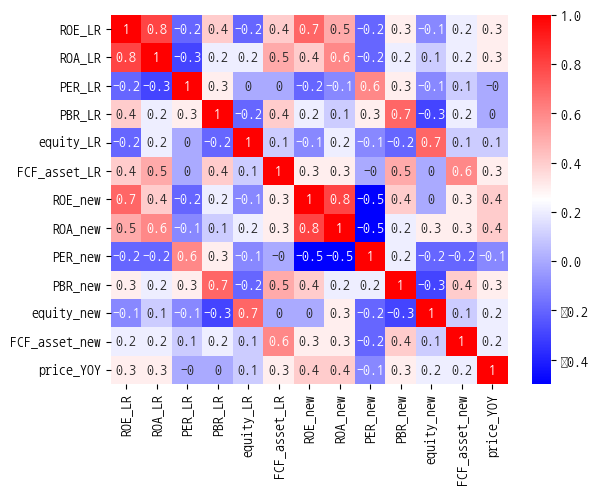

In [55]:
import pandas as pd
import seaborn as sns
YoY_path = '../data/StockMarketEDA_LR_new_US_YOY_'+ str(year) +'.csv'
StockMarketEDA_LR_new_US_YOY = pd.read_csv(YoY_path, index_col=0)

correlation_matrix = StockMarketEDA_LR_new_US_YOY.corr().round(1)

heatmap_path = '../data/heatmap_correlation_us_'+ str(year) +'.csv'

heatmap_correlation = StockMarketEDA_LR_new_US_YOY.corr()['price_YOY']#.tolist()
heatmap_correlation.to_csv(heatmap_path, sep=',', encoding='utf-8')
print(heatmap_correlation)
sns.heatmap(data=correlation_matrix, annot=True, cmap='bwr')

---
#### 연도별 weight 데이터 가공

In [56]:
# 데이터 불러오기
heatmap_correlation_2018 = pd.read_csv('../data/heatmap_correlation_us_2018.csv', index_col=0).rename(columns={"price_YOY":"2018"})
heatmap_correlation_2019 = pd.read_csv('../data/heatmap_correlation_us_2019.csv', index_col=0).rename(columns={"price_YOY":"2019"})
heatmap_correlation_2020 = pd.read_csv('../data/heatmap_correlation_us_2020.csv', index_col=0).rename(columns={"price_YOY":"2020"})
heatmap_correlation_2021 = pd.read_csv('../data/heatmap_correlation_us_2021.csv', index_col=0).rename(columns={"price_YOY":"2021"})
heatmap_correlation_2022 = pd.read_csv('../data/heatmap_correlation_us_2022.csv', index_col=0).rename(columns={"price_YOY":"2022"})

df_concat_correlation_value = pd.concat([heatmap_correlation_2018.T,
                                         heatmap_correlation_2019.T,
                                         heatmap_correlation_2020.T,
                                         heatmap_correlation_2021.T,
                                         heatmap_correlation_2022.T])

del df_concat_correlation_value['price_YOY']
df_concat_correlation_value.T.to_csv('../data/heatmap_correlation_us_all.csv', sep=',', encoding='utf-8')
df_concat_correlation_value = pd.read_csv('../data/heatmap_correlation_us_all.csv', index_col=0)
df_concat_correlation_value

,2018,2019,2020,2021,2022
ROE_LR,-0.025493,0.201549,-0.064842,0.294413,0.012986
ROA_LR,-0.000609,0.256281,-0.010597,0.264884,-0.035571
PER_LR,0.161547,0.075736,0.165640,-0.022472,-0.038311
PBR_LR,0.191302,0.207767,0.023981,0.033033,0.056826
equity_LR,-0.102897,0.136960,0.172407,0.084035,-0.067775
FCF_asset_LR,0.210430,0.197870,0.059113,0.270244,-0.048989
ROE_new,-0.094601,0.042782,-0.070870,0.388718,0.138779
ROA_new,-0.073992,0.136050,-0.074979,0.408220,0.074893
PER_new,0.136756,0.084274,0.336857,-0.065530,0.104806
PBR_new,0.245230,0.275480,0.172919,0.294258,0.325180


In [57]:
df_concat_correlation_value = pd.read_csv('../data/heatmap_correlation_us_all.csv', index_col=0)
df_concat_correlation_value

,2018,2019,2020,2021,2022
ROE_LR,-0.025493,0.201549,-0.064842,0.294413,0.012986
ROA_LR,-0.000609,0.256281,-0.010597,0.264884,-0.035571
PER_LR,0.161547,0.075736,0.165640,-0.022472,-0.038311
PBR_LR,0.191302,0.207767,0.023981,0.033033,0.056826
equity_LR,-0.102897,0.136960,0.172407,0.084035,-0.067775
FCF_asset_LR,0.210430,0.197870,0.059113,0.270244,-0.048989
ROE_new,-0.094601,0.042782,-0.070870,0.388718,0.138779
ROA_new,-0.073992,0.136050,-0.074979,0.408220,0.074893
PER_new,0.136756,0.084274,0.336857,-0.065530,0.104806
PBR_new,0.245230,0.275480,0.172919,0.294258,0.325180


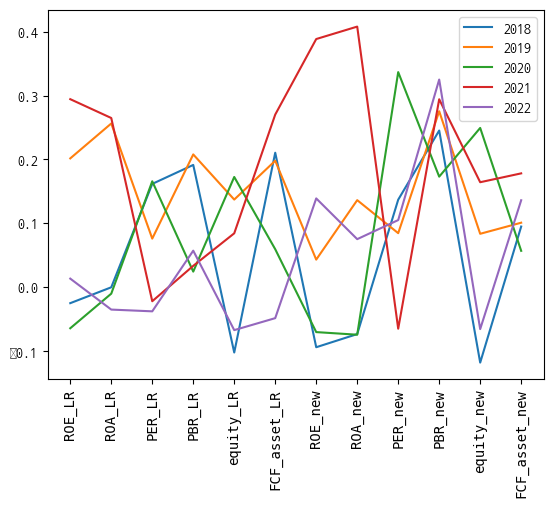

In [58]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rc('font', family = 'NanumGothicCoding')
year = ['2018', '2019', '2020', '2021', '2022']
# plt.figure(figsize =(12,8))
plt.plot(df_concat_correlation_value[year])
plt.legend(year, loc='best')

plt.xticks(
    fontsize=10,  #폰트사이즈
    rotation='vertical', # 가로 세로
    fontname='monospace',#폰트타입
    )
plt.show()

---
### LR 사용

In [102]:
StockMarketEDA_LR_new_US_YOY_2018 = pd.read_csv('../data/StockMarketEDA_LR_new_US_YOY_2018.csv', index_col=0).rename(columns={"price_YOY":"2022"})
StockMarketEDA_LR_new_US_YOY_2018

,ROE_LR,ROA_LR,PER_LR,PBR_LR,equity_LR,FCF_asset_LR,ROE_new,ROA_new,PER_new,PBR_new,equity_new,FCF_asset_new,2022
Apple,0.055576,-0.200966,0.169882,0.069825,-0.432072,-0.154253,0.032168,-0.328204,0.192161,0.154840,-0.149229,-0.316228,-0.093057
Microsoft,-0.061825,-0.343559,0.599779,0.273012,-0.666472,-0.364116,-1.073118,-1.719551,2.225152,0.425685,-1.379575,-0.726710,0.168005
Amazon,0.446216,0.364805,-0.377078,0.044045,-0.469297,0.163754,1.358231,1.234644,-0.024593,-0.068610,-0.695417,0.644158,0.243068
Tesla,-0.097036,-0.066735,0.000000,-0.451521,-0.081531,-0.121304,-0.118511,-0.509691,0.000000,-0.813808,-0.315175,-0.641426,0.041618
NVIDIA,0.470401,0.426252,0.325567,0.434591,-0.427627,0.477911,1.266384,1.138573,0.859455,1.295458,0.303168,1.735932,-0.329571
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Steel Dynamics,0.315209,0.301543,-0.344213,0.357574,0.278572,0.281112,1.036668,1.009636,-0.726417,-0.042743,0.581585,0.762435,-0.334151
Southwest Airlines,0.370636,0.389860,-0.289293,0.125138,-0.069230,0.244553,0.093137,0.103412,-0.358608,-0.302861,0.054066,1.273930,-0.294615
Hologic,-0.180292,-0.081883,-0.296076,0.239474,0.304878,0.016286,-0.947328,-0.773580,-0.110631,0.061872,0.071245,-0.093996,-0.056450
Hewlett Packard Enterprise,0.052850,-0.286252,0.220135,0.508105,-0.511920,-0.530445,0.641981,0.212714,-0.088082,0.996030,0.032998,-0.397776,-0.108145


---
---
## 상관계수의 검증

연도별 추출된 weight값은 서로끼리 얼마나 연관이 있나?
- 유사성 비교 알고리즘  
$$r_{rs} = \frac{\sum_{i=1}^n (X_{ri} - \overline{X_r}) (X_{si} - \overline{X_s})}{\sqrt{\sum_{i=1}^n (X_{ri} - \overline{X_r})^2}\sqrt{\sum_{i=1}^n (X_{si} - \overline{X_s})^2}}$$

In [63]:
from scipy.stats import pearsonr

def pearson_similarity(a, b):
    return np.dot((a - np.mean(a)), (b - np.mean(b))) / ((np.linalg.norm(a - np.mean(a))) * (np.linalg.norm(b - np.mean(b))))

display(pearson_similarity([3, 10, 7, 2], [2, 15, 10, 12])
       , pearsonr([3, 10, 7, 2], [2, 15, 10, 12])
       , np.corrcoef([3, 10, 7, 2], [2, 15, 10, 12]))

0.5756777782280114

PearsonRResult(statistic=0.5756777782280114, pvalue=0.42432222177198864)

array([[1.        , 0.57567778],
       [0.57567778, 1.        ]])